Crunching data with Pandas
====================

There are many different ways to pass data to DataFrames:

Memory
---------------------

In [1]:
# list
import pandas as pd
l = ["Alice", "Bob", "Carol","Dave"]
df = pd.DataFrame(l, columns=['name'])
print df

    name
0  Alice
1    Bob
2  Carol
3   Dave


In [2]:
# dictionary
myCat = {'size':'fat', 'color':'grey', 'disposition':'loud'}
df = pd.DataFrame(myCat, index={0})
print df
print df.transpose()

  color disposition size
0  grey        loud  fat
                0
color        grey
disposition  loud
size          fat


Files
---------------------

In [3]:
# csv
import csv
df = pd.read_csv("pagecounts-20071209-200000.gz", sep=" ", compression='gzip', header=None, quoting=csv.QUOTE_NONE)
print df.head() #show first 5 rows

    0                    1  2  3
0  aa       Current_events  1  1
1  aa  Enqlizxsh_-_English  4  4
2  aa            Main_Page  4  4
3  aa              Qembo_1  1  1
4  aa    Special:Imagelist  1  1


In [4]:
# add column headers
df.columns = ['site','page','count','size']
print df.head()

  site                 page  count  size
0   aa       Current_events      1     1
1   aa  Enqlizxsh_-_English      4     4
2   aa            Main_Page      4     4
3   aa              Qembo_1      1     1
4   aa    Special:Imagelist      1     1


In [5]:
# yes, but is it fast?
%time df = pd.read_csv("pagecounts-20071209-200000.gz", sep=" ", compression='gzip', header=None)#, quoting=csv.QUOTE_NONE)
print "Dataframe contains",len(df), "records"

CPU times: user 1.77 ms, sys: 1.3 ms, total: 3.07 ms
Wall time: 1.95 ms
Dataframe contains 1000 records


*myCat.json*
[
  {
    "color": "grey",
    "disposition": "loud",
    "size": "fat"
  }
]

In [7]:
# json
df = pd.read_json("myCat.json")
print df
print df.transpose()

  color disposition size
0  grey        loud  fat
                0
color        grey
disposition  loud
size          fat


<3 pickles
---------------------

In [8]:
df.to_pickle("myCat.pickle")
df = pd.read_pickle("myCat.pickle")
print df

  color disposition size
0  grey        loud  fat


In [9]:
# is it fast?
import csv
df = pd.read_csv("pagecounts-20071209-200000.gz", sep=" ", compression='gzip', header=None, quoting=csv.QUOTE_NONE)
%time df.to_pickle("pagecounts.pickle")
%time df = pd.read_pickle("pagecounts.pickle")

CPU times: user 1.45 ms, sys: 426 µs, total: 1.87 ms
Wall time: 3.76 ms
CPU times: user 1.56 ms, sys: 58 µs, total: 1.62 ms
Wall time: 1.62 ms


In [10]:
# Databases

# get a connection
import pymysql as db
con = db.connect(host="mysql.littlebabyprojects.com",
                 user="hackhour",
                 password="python<3",
                 database="hackhour",
                 charset='utf8')

In [11]:
import pandas.io.sql as psql
cursor = con.cursor()
df = psql.read_sql("select * from data", con)

In [12]:
df.head()

,index,0,1,2,3
0,0,aa,Current_events,1,1
1,1,aa,Enqlizxsh_-_English,4,4
2,2,aa,Main_Page,4,4
3,3,aa,Qembo_1,1,1
4,4,aa,Special:Imagelist,1,1


Manipulating DataFrames
====================

In [13]:
# deleting columns
del df['index']
df.head()

,0,1,2,3
0,aa,Current_events,1,1
1,aa,Enqlizxsh_-_English,4,4
2,aa,Main_Page,4,4
3,aa,Qembo_1,1,1
4,aa,Special:Imagelist,1,1


In [14]:
# adding columns
df['2+3'] = df['2'] + df['3']
df.head()

,0,1,2,3,2+3
0,aa,Current_events,1,1,2
1,aa,Enqlizxsh_-_English,4,4,8
2,aa,Main_Page,4,4,8
3,aa,Qembo_1,1,1,2
4,aa,Special:Imagelist,1,1,2


In [15]:
# looking at dataframes
df.dtypes

0      object
1      object
2       int64
3       int64
2+3     int64
dtype: object

In [16]:
# descriptive
df['0'].describe()

count     1000
unique       3
top         af
freq       958
Name: 0, dtype: object

In [17]:
# printing
print df['0'].unique()
print len(df['0'].unique())

[u'aa' u'ab' u'af']
3


In [18]:
# distribution of values
df['0'].value_counts()

af    958
ab     26
aa     16
dtype: int64

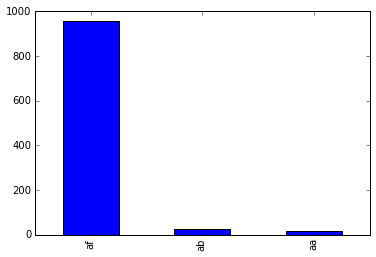

In [5]:
# plotting
%matplotlib inline
df['0'].value_counts().plot(kind='bar')

In [9]:
# create more complicated functions
def wordCount(st):
    return len(st.split("_"))


# <3 apply
df['wordCount'] = df['1'].apply(wordCount)
df.head()

,index,0,1,2,3,wordCount
0,0,aa,Current_events,1,1,2
1,1,aa,Enqlizxsh_-_English,4,4,3
2,2,aa,Main_Page,4,4,2
3,3,aa,Qembo_1,1,1,2
4,4,aa,Special:Imagelist,1,1,1


In [10]:
df['wordCount'].value_counts()

1     583
2     301
3      70
4      22
5      10
6       5
10      3
9       2
8       2
7       2
dtype: int64

In [13]:
# of course..you could do this too
df['wordcount2'] = df['1'].str.count('_')+1

In [14]:
df.head()

,index,0,1,2,3,wordCount,wordcount2
0,0,aa,Current_events,1,1,2,2
1,1,aa,Enqlizxsh_-_English,4,4,3,3
2,2,aa,Main_Page,4,4,2,2
3,3,aa,Qembo_1,1,1,2,2
4,4,aa,Special:Imagelist,1,1,1,1


In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,tmp,000766,0,53375,12547470310,012443 0,0,NaN,Current_events,1,1
1,aa,Enqlizxsh_-_English,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aa,Main_Page,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aa,Qembo_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aa,Special:Imagelist,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,aa,Special:Listusers,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,aa,Special:Listusers/bureaucrat,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,aa,Special:Listusers/sysop,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,aa,Special:Log/block,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,aa,Special:Log/delete,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
